In [2]:
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import figure

In [3]:
connection = psycopg2.connect(
    database="root",
    user="root",
    password="password",
    host="127.0.0.1",
    port="5432"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)

In [4]:
def getAll(query):
    db.execute(query)
    return db.fetchall()

In [56]:
def plot_bar(xs, ys, xlabel, ylabel, tittle, file_name, color="blue"):
    plt.figure(figsize=(12, 6))
    plt.bar(xs, ys)
    plt.savefig(f'file_name.png')
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    plt.show()

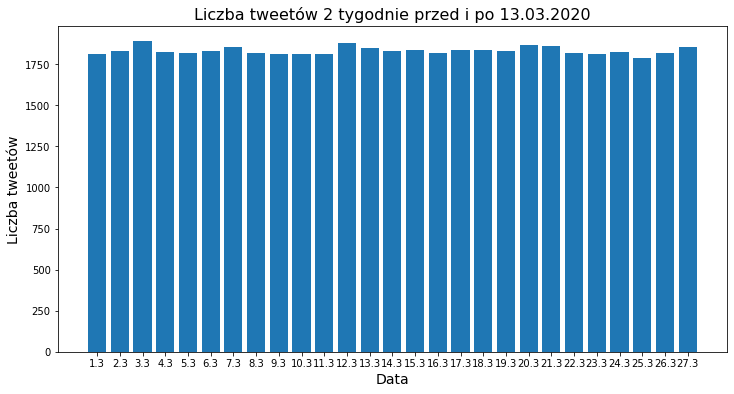

In [58]:
result = getAll(
    """
    select count(*) as "liczba tweetów", date(created_at) as "dzień"
from tweet
group by date(created_at), type
having date(created_at) >= date('02.28.2020')
   and date(created_at) <= date('03.27.2020')
   and type = 1;
   """
)

days = [f"{elem['dzień'].day}.{elem['dzień'].month}" for elem in result]
values = [int(elem["liczba tweetów"]) for elem in result]
plot_bar(days, values, "Data", "Liczba tweetów", "Liczba tweetów 2 tygodnie przed i po 13.03.2020",
         "tweets_daily_1.png")

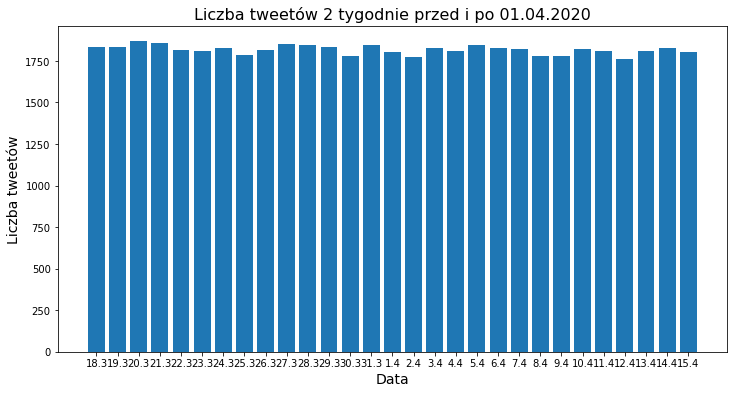

In [59]:
result = getAll(
    """
select count(*) as "liczba tweetów", date(created_at) as "dzień"
from tweet
group by date(created_at), type
having date(created_at) >= date('03.18.2020')
   and date(created_at) <= date('04.15.2020')
   and type = 1;
   """
)

days = [f"{elem['dzień'].day}.{elem['dzień'].month}" for elem in result]
values = [int(elem["liczba tweetów"]) for elem in result]
plot_bar(days, values, "Data", "Liczba tweetów", "Liczba tweetów 2 tygodnie przed i po 01.04.2020",
         "tweets_daily_2.png")

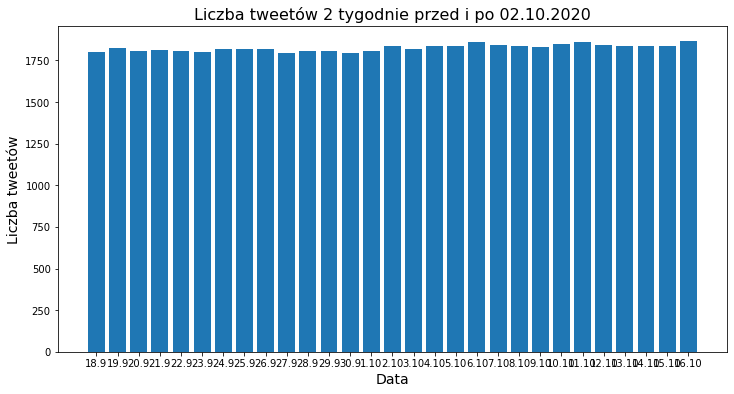

In [60]:
result = getAll(
    """
select count(*) as "liczba tweetów", date(created_at) as "dzień"
from tweet
group by date(created_at), type
having date(created_at) >= date('09.18.2020')
   and date(created_at) <= date('10.16.2020')
   and type = 1;
   """
)

days = [f"{elem['dzień'].day}.{elem['dzień'].month}" for elem in result]
values = [int(elem["liczba tweetów"]) for elem in result]
plot_bar(days, values, "Data", "Liczba tweetów", "Liczba tweetów 2 tygodnie przed i po 02.10.2020",
         "tweets_daily_3.png")

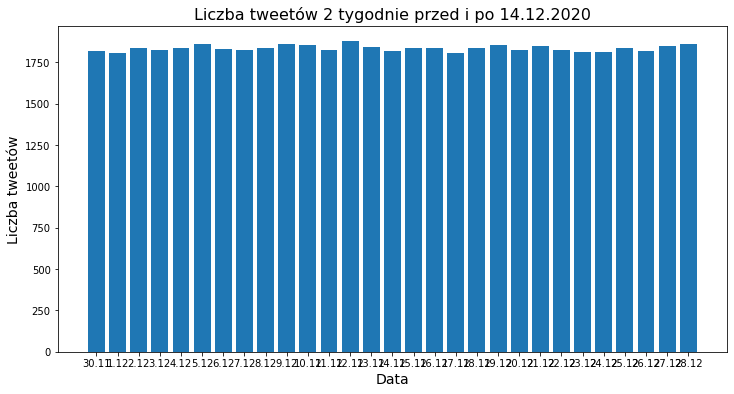

In [61]:
result = getAll(
    """
select count(*) as "liczba tweetów", date(created_at) as "dzień"
from tweet
group by date(created_at), type
having date(created_at) >= date('11.30.2020')
   and date(created_at) <= date('12.28.2020')
   and type = 1;
   """
)

days = [f"{elem['dzień'].day}.{elem['dzień'].month}" for elem in result]
values = [int(elem["liczba tweetów"]) for elem in result]
plot_bar(days, values, "Data", "Liczba tweetów", "Liczba tweetów 2 tygodnie przed i po 14.12.2020",
         "tweets_daily_4.png")

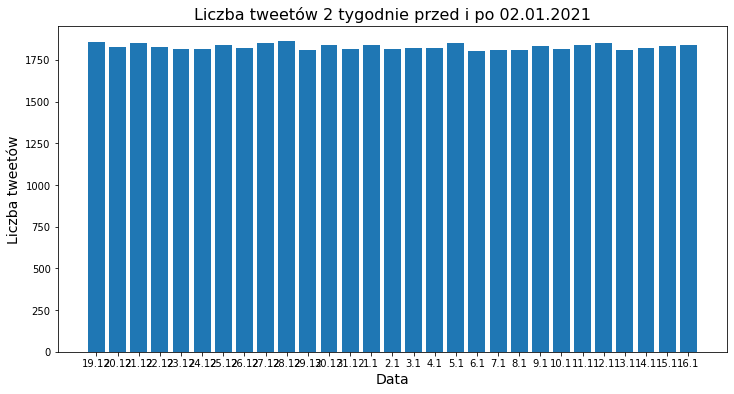

In [62]:
result = getAll(
    """
select count(*) as "liczba tweetów", date(created_at) as "dzień"
from tweet
group by date(created_at), type
having date(created_at) >= date('12.19.2020')
   and date(created_at) <= date('01.16.2021')
   and type = 1;
   """
)

days = [f"{elem['dzień'].day}.{elem['dzień'].month}" for elem in result]
values = [int(elem["liczba tweetów"]) for elem in result]
plot_bar(days, values, "Data", "Liczba tweetów", "Liczba tweetów 2 tygodnie przed i po 02.01.2021",
         "tweets_daily_5.png")

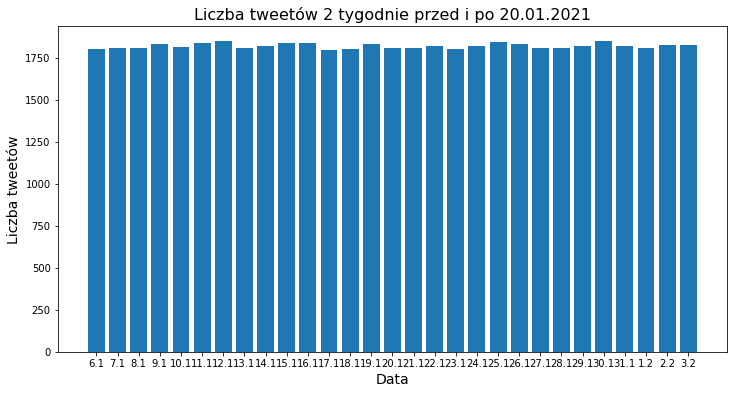

In [63]:
result = getAll(
    """
select count(*) as "liczba tweetów", date(created_at) as "dzień"
from tweet
group by date(created_at), type
having date(created_at) >= date('01.06.2021')
   and date(created_at) <= date('02.03.2021')
   and type = 1;
   """
)

days = [f"{elem['dzień'].day}.{elem['dzień'].month}" for elem in result]
values = [int(elem["liczba tweetów"]) for elem in result]
plot_bar(days, values, "Data", "Liczba tweetów", "Liczba tweetów 2 tygodnie przed i po 20.01.2021",
         "tweets_daily_6.png")


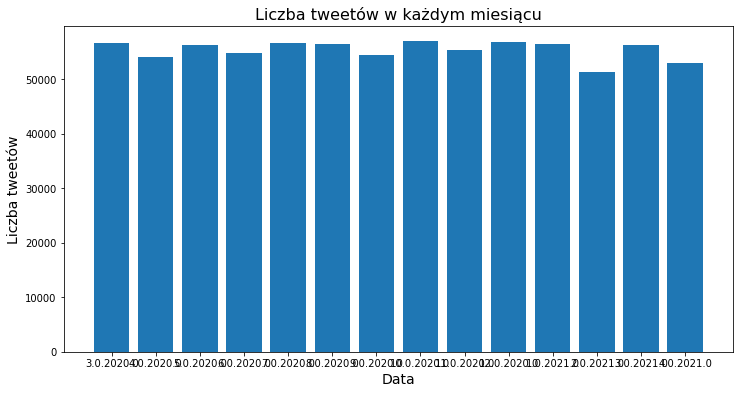

In [66]:
result = getAll(
    """
select count(*) as "liczba tweetów", date_part('month', created_at) as miesiac, date_part('year', created_at) as rok
from tweet
group by date_part('month', created_at), date_part('year', created_at), type
having type = 1
order by date_part('year', created_at), date_part('month', created_at);
   """
)

days = [f"{elem['miesiac']}.{elem['rok']}" for elem in result]
values = [int(elem["liczba tweetów"]) for elem in result]
plot_bar(days, values, "Data", "Liczba tweetów", "Liczba tweetów w każdym miesiącu",
         "tweets_daily_7.png")